#1.What is Computational Linguistics and how does it relate to NLP?
Computational Linguistics is the study of how to make computers understand, generate, and process human language in a way that is both meaningful and efficient.
It involves building algorithms that can analyze linguistic data (like text or speech) and simulate aspects of human language understanding.
Computational Linguistics provides the foundation (theory and algorithms), while NLP applies that knowledge to build functional systems.
Computational Linguistics = Science of language + computation
NLP (Natural Language Processing) = Technology built using computational linguistics principles
So, computational linguistics is the academic backbone of NLP — without it, modern systems like ChatGPT, Google Translate, or Siri wouldn’t exist.

#2.Briefly describe the historical evolution of Natural Language Processing.
The evolution of NLP reflects a progression from symbolic representation of linguistic rules to data-driven and neural representations of language knowledge.
This theoretical trajectory demonstrates the movement from explicit linguistic modeling → statistical inference → representation learning, leading to today’s context-aware, large-scale language models capable of human-like understanding and generation.

#3.List and explain three major use cases of NLP in today’s tech industry.
Three major use cases of NLP in today’s tech industry
1.Chatbots and Virtual Assistants
Use: Power conversational systems like ChatGPT, Siri, Alexa, and Google Assistant.
How it works: NLP enables these systems to understand user queries (Natural Language Understanding) and generate relevant responses (Natural Language Generation).
Impact: Enhances customer service, automates support, and provides 24/7 user interaction across industries like banking, healthcare, and e-commerce.
2. Sentiment Analysis
Use: Analyze opinions and emotions in text data, such as social media posts, product reviews, or customer feedback.
How it works: NLP models classify text as positive, negative, or neutral, helping businesses gauge public perception.
Impact: Supports brand monitoring, market analysis, and customer satisfaction management.
3. Machine Translation
Use: Automatically translate text or speech between languages (e.g., Google Translate, DeepL).
How it works: Uses NLP and deep learning (especially Transformer-based models) to understand sentence structure and context across languages.
Impact: Breaks communication barriers, supports global communication, and enables multilingual content accessibility.

#4.What is text normalization and why is it essential in text processing tasks?
Text normalization is the process of converting text into a standard, consistent, and uniform format before it is used for analysis or modeling in NLP tasks.
Text normalization transforms raw, unstructured text (which may contain variations, noise, or inconsistencies) into a canonical form that can be processed effectively by algorithms.
Text normalization is a crucial preprocessing step that cleans and standardizes raw text, ensuring that NLP models can focus on meaning rather than format variations.

#5.Compare and contrast stemming and lemmatization with suitable examples.
**Stemming**:Process of truncating words to their base or root form by removing suffixes or prefixes.
approach:Rule-based, mechanical truncation.
Lemmatization:Process of reducing words to their dictionary form (lemma) using linguistic knowledge.
approach:Linguistically informed; considers word meaning and grammar.
Stemming cuts off word endings to get rough roots (quick but crude),
while Lemmatization uses linguistic analysis to find true base forms (accurate but slower).
Example sentence:
“The children were playing happily.”
Stemming: child, play, happi
Lemmatization: child, play, happy



In [1]:
#6.Write a Python program that uses regular expressions (regex) to extract all email addresses from the following block of text:
'''“Hello team, please contact us at support@xyz.com for technical issues, or reach out to
our HR at hr@xyz.com. You can also connect with John at john.doe@xyz.org and jenny
via jenny_clarke126@mail.co.us. For partnership inquiries, email partners@xyz.biz.”'''
import re
# Input text
text = """
Hello team, please contact us at support@xyz.com for technical issues,
or reach out to our HR at hr@xyz.com. You can also connect with John at john.doe@xyz.org
and jenny via jenny_clarke126@mail.co.us. For partnership inquiries,
email partners@xyz.biz.
"""

# Regular expression pattern for email addresses
pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

# Extract all email addresses
emails = re.findall(pattern, text)

# Display the result
print("Extracted Email Addresses:")
for email in emails:
    print(email)



Extracted Email Addresses:
support@xyz.com
hr@xyz.com
john.doe@xyz.org
jenny_clarke126@mail.co.us
partners@xyz.biz


In [4]:
#7.Given the sample paragraph below, perform string tokenization and frequency distribution using Python and NLTK:
'''“Natural Language Processing (NLP) is a fascinating field that combines linguistics,
computer science, and artificial intelligence. It enables machines to understand,
interpret, and generate human language. Applications of NLP include chatbots,
sentiment analysis, and machine translation. As technology advances, the role of NLP
in modern solutions is becoming increasingly critical.”'''
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download required NLTK resources (run once)
nltk.download('punkt')
# nltk.download('punkt_tab') # This resource is not available in NLTK


# Input paragraph
text = """
Natural Language Processing (NLP) is a fascinating field that combines linguistics,
computer science, and artificial intelligence. It enables machines to understand,
interpret, and generate human language. Applications of NLP include chatbots,
sentiment analysis, and machine translation. As technology advances, the role of NLP
in modern solutions is becoming increasingly critical.
"""

# Step 1: Tokenize the text
tokens = word_tokenize(text)

# Step 2: Create frequency distribution
freq_dist = FreqDist(tokens)

# Step 3: Display results
print("Tokens:\n", tokens)
print("\nFrequency Distribution:\n")

# Display top 10 most common words
for word, freq in freq_dist.most_common(10):
    print(f"{word}: {freq}")

Tokens:
 ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', 'field', 'that', 'combines', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', '.', 'It', 'enables', 'machines', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', '.', 'Applications', 'of', 'NLP', 'include', 'chatbots', ',', 'sentiment', 'analysis', ',', 'and', 'machine', 'translation', '.', 'As', 'technology', 'advances', ',', 'the', 'role', 'of', 'NLP', 'in', 'modern', 'solutions', 'is', 'becoming', 'increasingly', 'critical', '.']

Frequency Distribution:

,: 7
.: 4
NLP: 3
and: 3
is: 2
of: 2
Natural: 1
Language: 1
Processing: 1
(: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#8.Create a custom annotator using spaCy or NLTK that identifies and labels proper nouns in a given text.
import spacy
from spacy.tokens import Span
from spacy.language import Language

# Load English model
nlp = spacy.load("en_core_web_sm")

# Custom proper noun annotator
@Language.component("proper_noun_annotator")
def proper_noun_annotator(doc):
    new_spans = []
    i = 0
    while i < len(doc):
        token = doc[i]
        # Start of a consecutive PROPN sequence not in existing entities
        if token.pos_ == "PROPN" and token.ent_iob_ == "O":
            start = i
            end = i + 1
            # Extend span for consecutive proper nouns
            while end < len(doc) and doc[end].pos_ == "PROPN" and doc[end].ent_iob_ == "O":
                end += 1
            new_spans.append(Span(doc, start, end, label="PROPER_NOUN"))
            i = end
        else:
            i += 1

    # Avoid overlapping with existing entities
    existing_tokens = set(token.i for ent in doc.ents for token in ent)
    final_spans = []
    for span in new_spans:
        if all(token.i not in existing_tokens for token in span):
            final_spans.append(span)
            for token in span:
                existing_tokens.add(token.i)

    doc.ents = list(doc.ents) + final_spans
    return doc

# Add the custom annotator to the pipeline
nlp.add_pipe("proper_noun_annotator", last=True)

# Sample text
text = "John and Mary work at OpenAI in San Francisco."

# Process the text
doc = nlp(text)

# Display custom annotations
print("Custom Proper Noun Annotations:")
for ent in doc.ents:
    if ent.label_ == "PROPER_NOUN":
        print(f"{ent.text} → {ent.label_}")


In [ ]:
#9.Using Genism, demonstrate how to train a simple Word2Vec model on the following dataset consisting of example sentences:
dataset = [
 """Natural language processing enables computers to understand human language",
 "Word embeddings are a type of word representation that allows words with similar
meaning to have similar representation",
 "Word2Vec is a popular word embedding technique used in many NLP applications",
 "Text preprocessing is a critical step before training word embeddings",
 "Tokenization and normalization help clean raw text for modeling"""
]#Write code that tokenizes the dataset, preprocesses it, and trains a Word2Vec model using Gensim.
# Import required libraries
%pip install gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Sample dataset
dataset = [
    "Natural language processing enables computers to understand human language",
    "Word embeddings are a type of word representation that allows words with similar meaning to have similar representation",
    "Word2Vec is a popular word embedding technique used in many NLP applications",
    "Text preprocessing is a critical step before training word embeddings",
    "Tokenization and normalization help clean raw text for modeling"
]# Step 1: Tokenize and preprocess the dataset
# simple_preprocess lowercases and tokenizes text, removing punctuation
tokenized_data = [simple_preprocess(sentence) for sentence in dataset]

print("Tokenized Data:")
for tokens in tokenized_data:
    print(tokens)

# Step 2: Train a Word2Vec model
model = Word2Vec(
    sentences=tokenized_data,  # training data
    vector_size=100,           # size of word vectors
    window=5,                  # context window size
    min_count=1,               # ignore words with frequency < 1
    workers=4,                 # number of threads
    sg=1                       # use skip-gram; sg=0 for CBOW
)
# Step 3: Save the model (optional)
model.save("word2vec_model.model")
# Step 4: Access word vectors
print("\nWord Vector for 'language':")
print(model.wv['language'])
# Step 5: Find most similar words
print("\nMost similar words to 'word':")
print(model.wv.most_similar('word', topn=5))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Review: The mobile app is very easy to use and transfers are fast!
Cleaned: mobile app easy use transfer fast
Sentiment Polarity: 0.31666666666666665

Review: I had issues with login, customer support was slow to respond.
Cleaned: issue login customer support slow respond
Sentiment Polarity: -0.30000000000000004

Review: Payments fail frequently, very frustrating experience.
Cleaned: payment fail frequently frustrating experience
Sentiment Polarity: -0.45

Review: Love the new update, UI is clean and intuitive!
Cleaned: love new update ui clean intuitive
Sentiment Polarity: 0.33434343434343433

Review: Account verification took too long, needs improvement.
Cleaned: account verification took long need improvement
Sentiment Polarity: -0.05



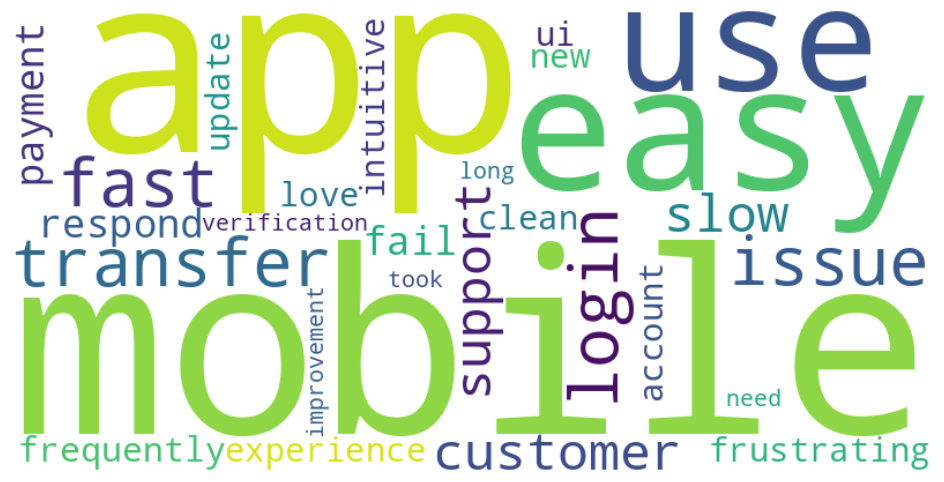

Top words for Review 1: ['use', 'transfer', 'mobile', 'app', 'easy']
Top words for Review 2: ['support', 'slow', 'respond', 'login', 'issue']
Top words for Review 3: ['payment', 'fail', 'experience', 'frequently', 'frustrating']
Top words for Review 4: ['update', 'ui', 'new', 'intuitive', 'love']
Top words for Review 5: ['verification', 'need', 'took', 'improvement', 'long']


In [14]:
#10.Imagine you are a data scientist at a fintech startup. You’ve been taskedwith analyzing customer feedback. Outline the steps you would take to clean, process, and extract useful insights using NLP techniques from thousands of customer reviews.
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Sample dataset (replace with your actual reviews dataset)
reviews = [
    "The mobile app is very easy to use and transfers are fast!",
    "I had issues with login, customer support was slow to respond.",
    "Payments fail frequently, very frustrating experience.",
    "Love the new update, UI is clean and intuitive!",
    "Account verification took too long, needs improvement."
]# Step 1: Data Cleaning & Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    # Remove special characters, numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
cleaned_reviews = [clean_text(review) for review in reviews]
# Step 2: Sentiment Analysis
sentiments = [TextBlob(review).sentiment.polarity for review in cleaned_reviews]
for i, review in enumerate(reviews):
    print(f"Review: {review}")
    print(f"Cleaned: {cleaned_reviews[i]}")
    print(f"Sentiment Polarity: {sentiments[i]}\n")
# Step 3: TF-IDF Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_reviews)
feature_names = vectorizer.get_feature_names_out()
# Step 4: Word Cloud Visualization
all_text = ' '.join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 5: Optional - Display top TF-IDF features per review
for i, review_vec in enumerate(X.toarray()):
    top_indices = review_vec.argsort()[-5:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"Top words for Review {i+1}: {top_words}")
